In [15]:
#%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [3]:
bk_train_na = pd.read_csv('bk_train_na.csv')

In [41]:
bk_train_na.head()

,Unnamed: 0,Latitude,Longitude,Created Date,Closed Date,Incident Zip,Police Precincts,Community Board,Start Date,Close Date,Resolution Time (days),YEAR,Count,Neighborhood,Center Lo,Center La
0,0,40.696892,-73.974561,03/13/2017 10:24:50 AM,06/05/2017 12:00:00 AM,11205.0,55.0,02,2017-03-13 10:24:50,2017-06-05 00:00:00,83.0,2017,1,Fort Greene,-73.974883,40.690803
1,2,40.633669,-74.000685,03/14/2017 08:51:04 AM,06/05/2017 12:00:00 AM,11219.0,39.0,12,2017-03-14 08:51:04,2017-06-05 00:00:00,82.0,2017,1,Borough Park,-73.988663,40.630958
2,3,40.702580,-73.945714,03/14/2017 03:50:57 PM,04/06/2017 12:00:00 AM,11206.0,56.0,01,2017-03-14 15:50:57,2017-04-06 00:00:00,22.0,2017,1,Bedford,-73.949906,40.691516
3,5,40.630213,-74.004305,03/14/2017 08:52:50 AM,04/04/2017 12:00:00 AM,11219.0,41.0,10,2017-03-14 08:52:50,2017-04-04 00:00:00,20.0,2017,1,Dyker Heights,-74.012095,40.622446
4,9,40.700413,-73.912687,03/14/2017 07:28:38 PM,04/21/2017 12:00:00 AM,11237.0,53.0,04,2017-03-14 19:28:38,2017-04-21 00:00:00,37.0,2017,1,Bushwick North,-73.917767,40.700569


In [7]:
house_rate = pd.read_csv('Datasets/house_rate.csv')

In [9]:
house_graf_merge = pd.read_csv('Datasets/house_graf_merge.csv')

In [12]:
house_graf_merge.head()

,Unnamed: 0,YEAR,Neighborhood,Center Lo,Center La,Count,Resolution Time (days),New Market Value,Old Market Value,Value Change Rate
0,0,2011,Bath Beach,-74.007489,40.604278,15,38.000000,624700.221990,616931.215531,0.012593
1,1,2011,Bay Ridge,-74.029894,40.624844,104,43.048077,810009.046501,817854.860092,-0.009593
2,2,2011,Bedford,-73.949906,40.691516,240,44.916667,441941.250112,480476.837844,-0.080203
3,3,2011,Bensonhurst East,-73.983539,40.601437,74,30.135135,556090.505116,583175.265057,-0.046444
4,4,2011,Bensonhurst West,-73.995261,40.612227,125,51.824000,658005.077256,668619.580564,-0.015875


## reduceData

In [64]:
train_set = bk_train_na[['YEAR', 'Start Date', 'Neighborhood', 'Incident Zip', 'Resolution Time (days)', 'Count']]

In [65]:
train_set['Month'] = pd.DatetimeIndex(train_set['Start Date']).strftime("%m")

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
train_set[train_set['YEAR']==2011].head()

,YEAR,Start Date,Neighborhood,Incident Zip,Resolution Time (days),Count,Month
15482,2011,2011-02-04 13:52:25,Greenpoint,11222.0,27.0,1,02
15484,2011,2011-03-25 13:50:15,Sunset Park East,11220.0,48.0,1,03
15486,2011,2011-07-08 13:50:31,Bushwick South,11206.0,6.0,1,07
15488,2011,2011-10-22 18:06:56,Bay Ridge,11209.0,51.0,1,10
15489,2011,2011-10-31 08:28:03,Bay Ridge,11209.0,43.0,1,10


In [68]:
train_ct = train_set[['YEAR', 'Month', 'Neighborhood', 'Incident Zip', 'Count']]

# Altair

In [10]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

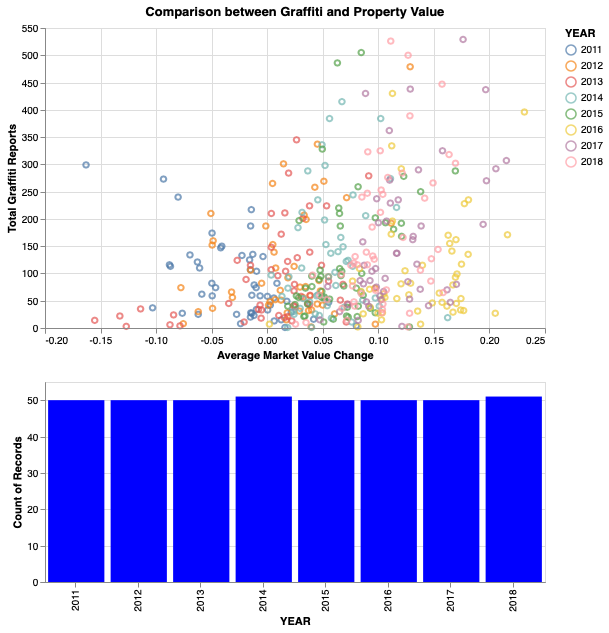

In [36]:
size_selector = alt.selection_multi(encodings=['x'], empty='all')
#scatter_selector = alt.selection(type='interval', encodings=['x','y'], empty='all')
scatter_selector = alt.selection(type='interval', encodings=['x'], empty='all') #only allows selector left/right

scatter = alt.Chart(house_graf_merge, width = 500, title="Comparison between Graffiti and Property Value").mark_point().encode(
    alt.X("Value Change Rate:Q", title='Average Market Value Change'),
    alt.Y('Count:Q', title='Total Graffiti Reports'),
    color = alt.condition(size_selector | scatter_selector, "YEAR:N", alt.value("white")), 
    tooltip = ['Neighborhood', 'Count', alt.Tooltip('Value Change Rate', title='Average Market Value Change'), 
               'Resolution Time (days)', 'YEAR']
).add_selection(scatter_selector)
    
size_hist = alt.Chart(house_graf_merge, width=500, height=200).mark_bar().encode(
    x = "YEAR:N",
    y = "count()",
    color = alt.condition(size_selector , alt.value("blue"), alt.value("lightgray"))
).transform_filter(
    scatter_selector
).add_selection(size_selector)

scat = scatter & size_hist
scat.save('graf_prop_scat.json')
scat.save('graf_prop_scat.html')
scat

# Seaborn

In [13]:
three = house_graf_merge[['Count', 'Resolution Time (days)', 'Value Change Rate']]

In [176]:
three['Log Ct'] = np.log(three['Graffiti'])

In [17]:
three = three.rename(columns={"Count": "Graffiti", "Resolution Time (days)": "Response Time", 'Value Change Rate': 'Property Value'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58aeeb2518>,
      dtype=object)

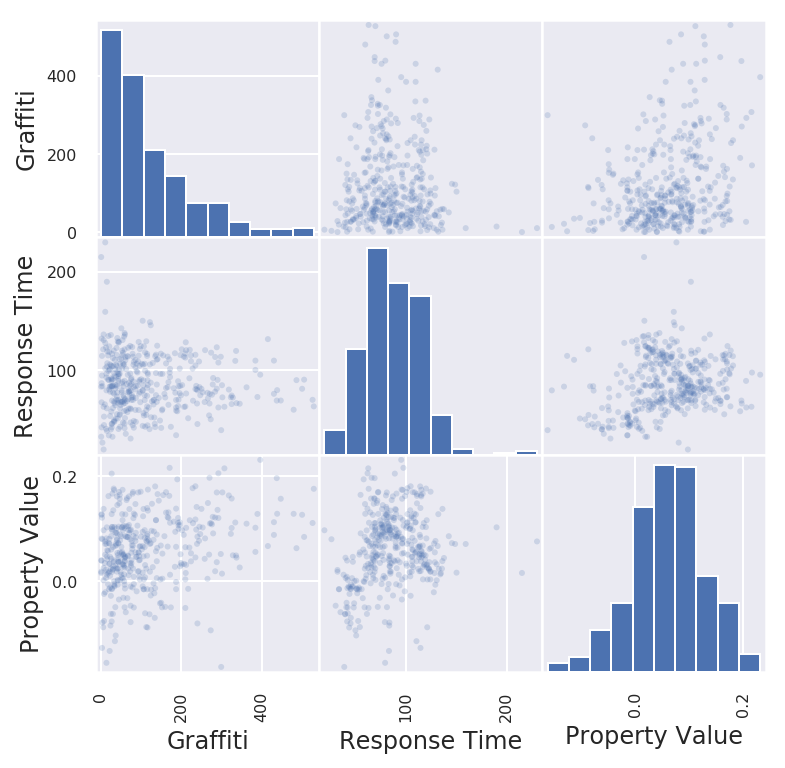

In [21]:
pd.plotting.scatter_matrix(three, alpha=0.2, figsize=(6, 6), diagonal='hist')
#title='Graffiti Reports to 311 compared with Property Market Value Change'

In [22]:
three.corr(method='pearson')

,Graffiti,Response Time,Property Value
Graffiti,1.000000,-0.053588,0.276216
Response Time,-0.053588,1.000000,0.217631
Property Value,0.276216,0.217631,1.000000


In [178]:
three.corr(method='pearson')

,Graffiti,Response Time,Property Value,Log Ct
Graffiti,1.000000,-0.053588,0.276216,0.826462
Response Time,-0.053588,1.000000,0.217631,-0.076910
Property Value,0.276216,0.217631,1.000000,0.244380
Log Ct,0.826462,-0.076910,0.244380,1.000000


/opt/conda/envs/data3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


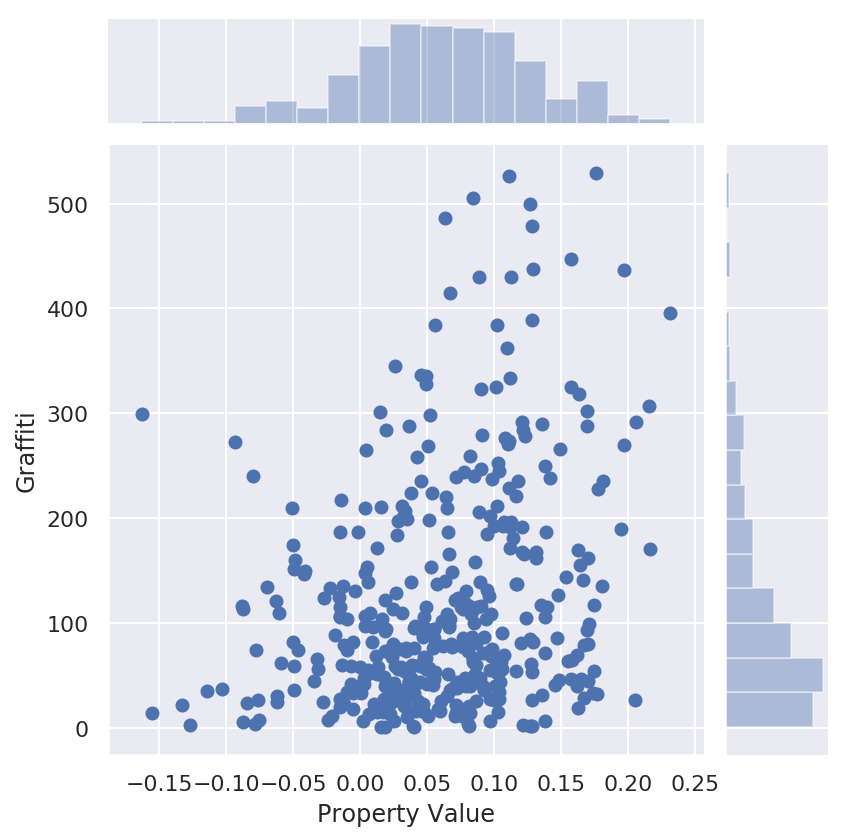

In [23]:
sns.jointplot(x='Property Value', y='Graffiti', data=three)

/opt/conda/envs/data3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


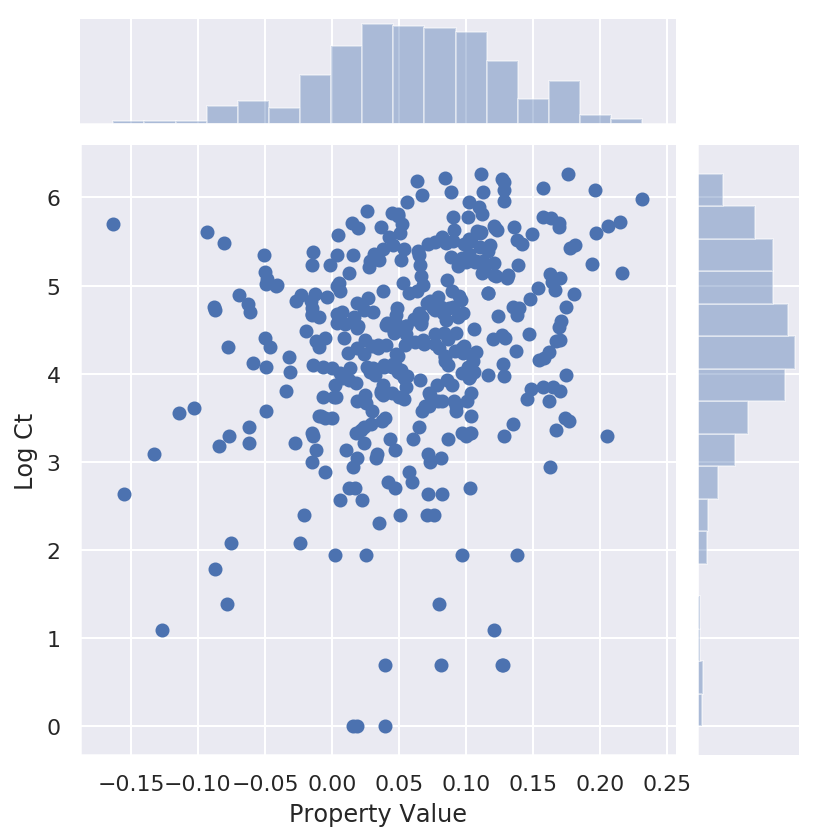

In [177]:
sns.jointplot(x='Property Value', y='Log Ct', data=three)

In [24]:
three_yr = house_graf_merge[['YEAR', 'Count', 'Resolution Time (days)', 'Value Change Rate']]

In [25]:
three_yr = three_yr.rename(columns={"YEAR": 'Year', "Count": "Graffiti", "Resolution Time (days)": "Response Time", 'Value Change Rate': 'Property Value'})

/opt/conda/envs/data3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


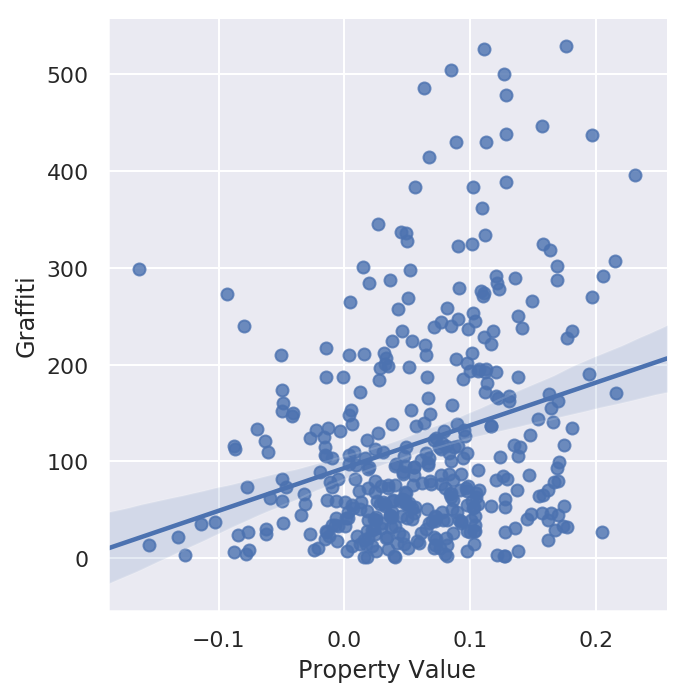

In [28]:
sns.lmplot(x='Property Value', y='Graffiti', data=three)